In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from jax import grad
import jax.numpy as jnp

1. How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.

- The order of a resultant matrix obtained from the multiplication of a (n, k) and (k, m) matrix is (n,m).
- multiplications = (n*m)*k
- Addition = (n*m)*(k-1)
- Suppose the matrix is A[i][j] for multiplication we multiply ith row of 1st matrix with j th column of 2nd matrix and in each set of multiplication
-  number of elements in jth column of the 2nd matrix are getting mutlipled and number of elements in jth column minus 1 of the 2nd matrix are getting
-  added.

2. Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?

In [1]:
import numpy as np
import time
a = np.random.randint(0, 11, size=(3, 4))
b = np.random.randint(0, 11, size=(4, 5))
c = np.zeros((3, 5))
n=3
m=5
k=4
t1=time.time()
for i in range(n):
    for j in range(m):
        for l in range(k):
            c[i][j] += a[i][l] * b[l][j]
t2= time.time()
t3=time.time()
matrix = np.matmul(a,b)
t4=time.time()
print(f"Time taken by for loop",t2-t1)
print(f"Time taken by using numpy",t4-t3)

Time taken by for loop 0.0012056827545166016
Time taken by using numpy 0.0


3. Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against numpy.median routine in terms of time?

In [110]:
import numpy as np
import time 

n = 100
a = np.random.randint(0,15,size=n)
ptr=0
t1 = time.time()
for i in range(n//2+1):
    ind=i
    for j in range(i,n):
        if a[ind]>a[j]:
            ind=j
    a[ind],a[i] = a[i],a[ind]
print("Median is:",end=" ")
if n%2!=0:
    print(a[n//2])
else:
    print((a[n//2-1]+a[n//2])/2)
t2 = time.time()

print("Time taken:",t2-t1,"s")

Median is: 6.0
Time taken: 0.002810239791870117 s


 4. What is the gradient of the following function with respect to x and y?


The gradient desecnt wrt x is : 2xy + y^3cos(x)
The gradient desecnt wrt y is : x^2 + 3y^2sin(x)

5. Use JAX to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y


In [9]:
def func(x, y):
    return x**2*y + y**3*jnp.sin(x)

grad_jax = grad(func,argnums=[0,1])
grad_x,grad_y = grad_jax(0.0,3.0) 
print("Gradient wrt x at (0,3):",grad_x)
print("Gradient wrt y at (0,3):",grad_y)

def grad_check(x,y):
    grad_x = 2*x*y + y**3*np.cos(x)
    grad_y = x**2 + 3*y**2*np.sin(x)
    return grad_x, grad_y

print()
print("Checking values manually")
print("Gradient wrt x at (0,3):",grad_check(0,3)[0])
print("Gradient wrt y at (0,3):",grad_check(0,3)[1])

Gradient wrt x at (0,3): 27.0
Gradient wrt y at (0,3): 0.0

Checking values manually
Gradient wrt x at (0,3): 27.0
Gradient wrt y at (0,3): 0.0


6. Use sympy to confirm that you obtain the same gradient analytically.


In [108]:
import sympy as sp

def expression(x,y):
    return (x**2)*y + (y**3)*sp.sin(x)

x, y = sp.symbols('x y')

grad_x = sp.diff(expression(x,y),x)
grad_y = sp.diff(expression(x,y),y)

print(f"gradient decent wrt x : {grad_x}")
print(f"gradient decent wrt y : {grad_y}")

gradient decent wrt x : 2*x*y + y**3*cos(x)
gradient decent wrt y : x**2 + 3*y**2*sin(x)


7. Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks. Something like:


In [5]:
Student_data = {
    "2022" : {
        "Branch1" : {
            "Roll no. 1":{1},
            "Name" : {"N"},
            "Marks" : {
                "Maths" : {100},
                "English" : {70}
            }
        },

        "Branch2" : {
            "Roll no. 1":{1},
            "Name" : {"N"},
            "Marks" : {
                "Maths" : {100},
                "English" : {70}
            }
        }
        
    },
    "2023" : {
        "Branch1" : {
            "Roll no. 1":{1},
            "Name" : {"N"},
            "Marks" : {
                "Maths" : {100},
                "English" : {70}
            }
        },

        "Branch2" : {
            "Roll no. 1":{1},
            "Name" : {"N"},
            "Marks" : {
                "Maths" : {100},
                "English" : {70}
            }
        }


    },
    "2024" : {
        "Branch1" : {
            "Roll no. 1":{1},
            "Name" : {"N"},
            "Marks" : {
                "Maths" : {100},
                "English" : {70}
            }
        },

        "Branch2" : {
            "Roll no. 1":{1},
            "Name" : {"N"},
            "Marks" : {
                "Maths" : {100},
                "English" : {70}
            }
        }


    },
    "2025" : {
        "Branch1" : {
            "Roll no. 1":{1},
            "Name" : {"N"},
            "Marks" : {
                "Maths" : {100},
                "English" : {70}
            }
        },
        "Branch2" : {
            "Roll no. 1":{1},
            "Name" : {"N"},
            "Marks" : {
                "Maths" : {100},
                "English" : {70}
            }
        }
    }
}

In [112]:
Student_data['2022']

{'Branch1': {'Roll no. 1': {1},
  'Name': {'N'},
  'Marks': {'Maths': {100}, 'English': {70}}},
 'Branch2': {'Roll no. 1': {1},
  'Name': {'N'},
  'Marks': {'Maths': {100}, 'English': {70}}}}

8. Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.

In [25]:
class Student:
    def __init__(self, name, roll):
        self.name = name
        self.roll = roll
        self.marks = {}

    def add_marks(self, subject, marks):
        self.marks[subject] = marks

class Branch:
    def __init__(self):
        self.students = []

    def add_student(self, student):
        self.students.append(student)

class Year:
    def __init__(self):
        self.branches = []

    def add_branch(self, branch):
        self.branches.append(branch)

# Creating the database
database = []

# Function to add data for a particular year
def add_year_data(year):
    year_obj = Year()
    
    branch1 = Branch()
    student1_b1 = Student("N", 1)
    student1_b1.add_marks("Maths", 100)
    student1_b1.add_marks("English", 70)
    branch1.add_student(student1_b1)
    year_obj.add_branch(branch1)
    
    branch2 = Branch()
    student1_b2 = Student("N", 1)
    student1_b2.add_marks("Maths", 100)
    student1_b2.add_marks("English", 70)
    branch2.add_student(student1_b2)
    year_obj.add_branch(branch2)
    
    database.append(year_obj)

# Adding data for the years 2022 to 2025
for year in range(2022, 2026):
    add_year_data(year)

# Example: Accessing the name of the first student in the first branch of the year 2022
print(database[0].branches[0].students[0].name)


N


9. Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.


In [11]:
x = np.arange(0.5,100.5,0.5)

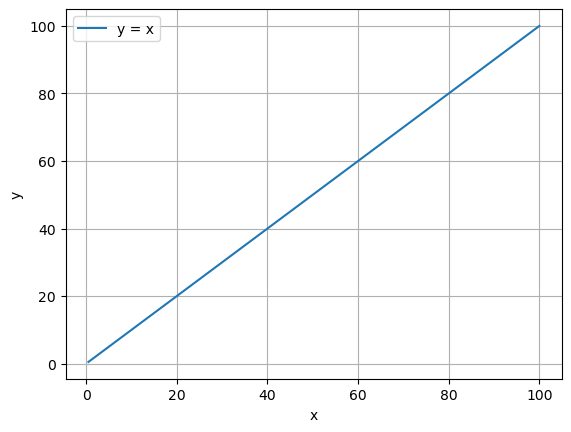

In [14]:
# 1. y=x

y = x

plt.plot(x,y,label= 'y = x')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

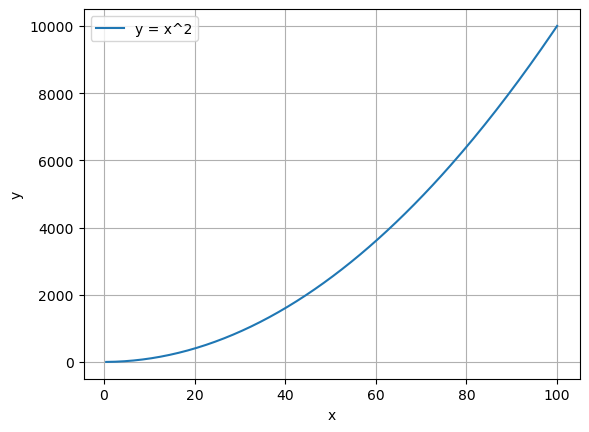

In [15]:
y = x**2

plt.plot(x,y,label= 'y = x^2')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

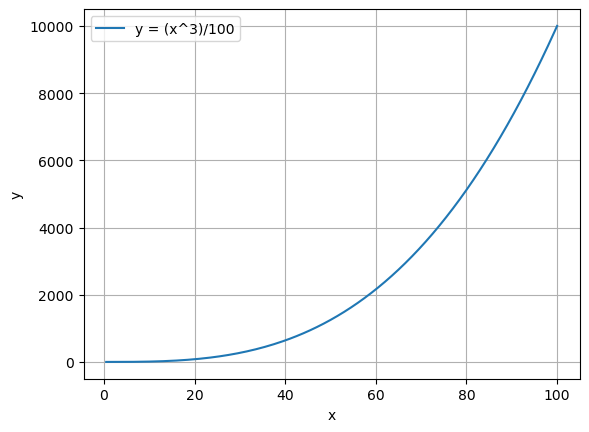

In [17]:
y = x**3/100

plt.plot(x,y,label= 'y = (x^3)/100')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

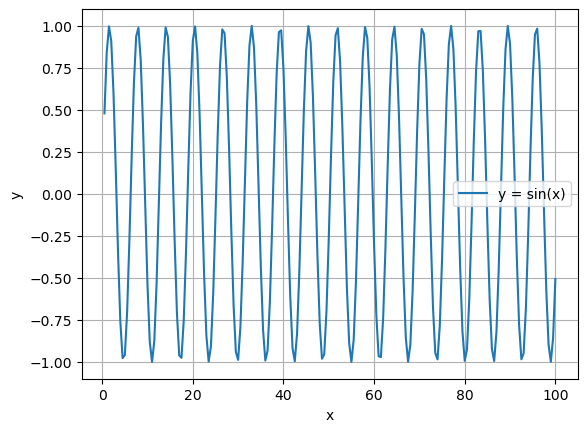

In [18]:
y = np.sin(x)

plt.plot(x,y,label= 'y = sin(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

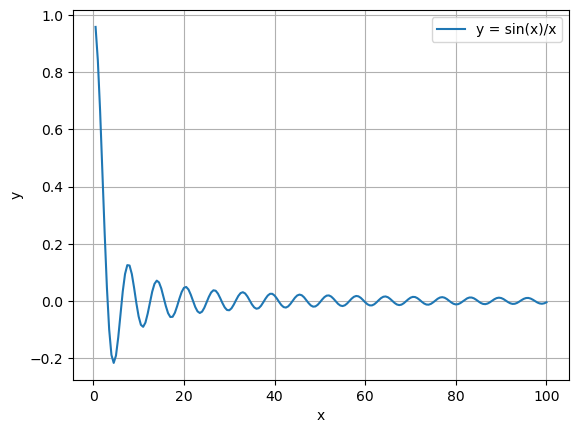

In [19]:
y = np.sin(x)/x

plt.plot(x,y,label= 'y = sin(x)/x')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

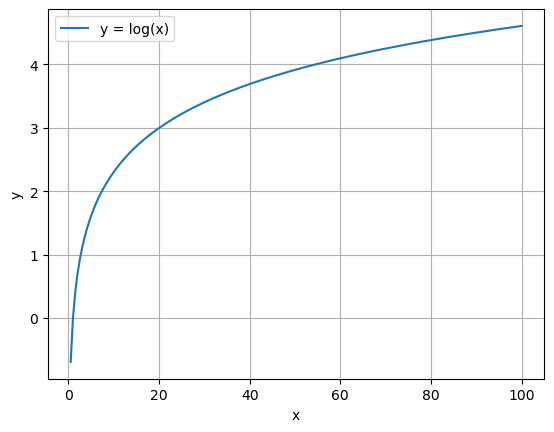

In [20]:
y = np.log(x)

plt.plot(x,y,label= 'y = log(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

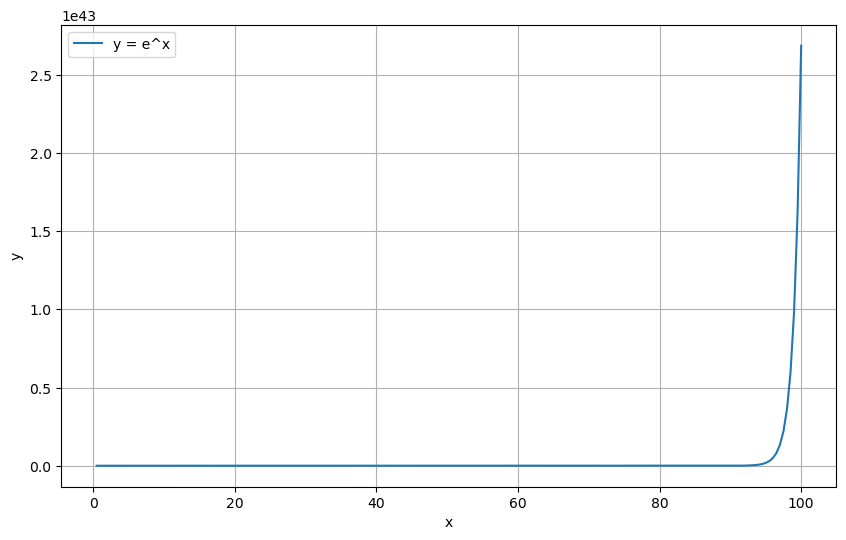

In [25]:
y = np.exp(x)

plt.figure(figsize=(10, 6))
plt.plot(x,y,label= 'y = e^x')
# plt.ylim([0,1000])
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

10. Using numpy generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.

In [46]:
n = 20
m = 5
matrix = np.random.uniform(1, 2, (n, m))
df = pd.DataFrame(matrix)
df.columns=['a','b','c','d','e']

print(df)

           a         b         c         d         e
0   1.435745  1.626564  1.853652  1.191994  1.278228
1   1.515454  1.084765  1.715721  1.428267  1.624914
2   1.504904  1.117675  1.863393  1.422260  1.518667
3   1.250858  1.300706  1.656296  1.775423  1.123746
4   1.404524  1.113381  1.416928  1.600434  1.096930
5   1.302393  1.483354  1.791243  1.214746  1.759382
6   1.196953  1.848018  1.619761  1.357469  1.115957
7   1.141933  1.290621  1.679044  1.161704  1.824834
8   1.667751  1.610563  1.568654  1.818585  1.278433
9   1.809612  1.798216  1.858591  1.889586  1.836124
10  1.385092  1.492928  1.716368  1.925587  1.199707
11  1.655465  1.169192  1.572317  1.852469  1.797019
12  1.120422  1.322318  1.943503  1.473875  1.755234
13  1.381496  1.971637  1.172579  1.915180  1.835477
14  1.394774  1.188957  1.634994  1.853033  1.834051
15  1.485972  1.702389  1.262075  1.437592  1.527564
16  1.615883  1.000755  1.221698  1.915879  1.541395
17  1.895208  1.992232  1.530100  1.773804  1.

11. Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.

In [48]:
df['f']=df.sum(axis=1)
df

,a,b,c,d,e,f
0,1.435745,1.626564,1.853652,1.191994,1.278228,7.386183
1,1.515454,1.084765,1.715721,1.428267,1.624914,7.369122
2,1.504904,1.117675,1.863393,1.422260,1.518667,7.426899
3,1.250858,1.300706,1.656296,1.775423,1.123746,7.107029
4,1.404524,1.113381,1.416928,1.600434,1.096930,6.632197
5,1.302393,1.483354,1.791243,1.214746,1.759382,7.551119
6,1.196953,1.848018,1.619761,1.357469,1.115957,7.138157
7,1.141933,1.290621,1.679044,1.161704,1.824834,7.098135
8,1.667751,1.610563,1.568654,1.818585,1.278433,7.943986
9,1.809612,1.798216,1.858591,1.889586,1.836124,9.192127


In [51]:
df.loc[df['f']>8,'g']='GT8'
df.loc[df['f']<8,'g']='LT8'
df

,a,b,c,d,e,f,g
0,1.435745,1.626564,1.853652,1.191994,1.278228,7.386183,LT8
1,1.515454,1.084765,1.715721,1.428267,1.624914,7.369122,LT8
2,1.504904,1.117675,1.863393,1.422260,1.518667,7.426899,LT8
3,1.250858,1.300706,1.656296,1.775423,1.123746,7.107029,LT8
4,1.404524,1.113381,1.416928,1.600434,1.096930,6.632197,LT8
5,1.302393,1.483354,1.791243,1.214746,1.759382,7.551119,LT8
6,1.196953,1.848018,1.619761,1.357469,1.115957,7.138157,LT8
7,1.141933,1.290621,1.679044,1.161704,1.824834,7.098135,LT8
8,1.667751,1.610563,1.568654,1.818585,1.278433,7.943986,LT8
9,1.809612,1.798216,1.858591,1.889586,1.836124,9.192127,GT8


In [54]:
SD_LT8 = df.loc[df['g']=='LT8','f'].std()
SD_GT8 = df.loc[df['g']=='GT8','f'].std()
print(f'Standard Deviation of f coressponding to LT8 : ',SD_LT8)
print(f'Standard Deviation of f coressponding to GT8 : ',SD_GT8)

Standard Deviation of f coressponding to LT8 :  0.3670887612589275
Standard Deviation of f coressponding to GT8 :  0.5530791435001804


12 . Write a small piece of code to explain broadcasting in numpy.

In [58]:
a = np.random.randint(0,7,size = (5,1))
a

array([[5],
       [2],
       [6],
       [1],
       [0]])

In [59]:
b = np.random.randint(2,9,size = (1,5))
b

array([[7, 8, 5, 2, 2]])

In [60]:
a+b

array([[12, 13, 10,  7,  7],
       [ 9, 10,  7,  4,  4],
       [13, 14, 11,  8,  8],
       [ 8,  9,  6,  3,  3],
       [ 7,  8,  5,  2,  2]])

13. Write a function to compute the argmin of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the np.argmin function to verify your solution.

In [103]:
def argMin(arr):
    mini = 1000
    ind = 0
    for i in range(0,len(arr)):
        if(arr[i]<mini):
            mini = arr[i]
            ind = i
    return ind




In [104]:
arr = np.random.randint(3,10,20)
arr

array([7, 5, 3, 3, 6, 6, 9, 7, 5, 9, 9, 4, 7, 3, 7, 3, 7, 6, 6, 7])

In [105]:
minIndex = argMin(arr)
minIndex

2

In [106]:
verify = np.argmin(arr)
verify

2